In [1]:
import numpy as np
import scipy as sp
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)

def rndm(a, b, g, size=1):
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

E0 = 10**15
E1 = 10**18
gamma = -2.5
N= 10000

E = rndm(E0, E1, gamma, N) 
A = 10**12
B = 1.2

def S_ref(A,B,E):
    return (E/A)**(1/B)

S_i_ref=S_ref(A,B,E)
cos_2 = np.random.rand(N)

def S_i(alpha, beta, delta, cos, f):
    cos_ref=np.cos(38.*np.pi/180.)**2
    x = cos-cos_ref
    return f*(1+beta*x+delta*x**2)

a=0.919
b=1.13
c=1


S=S_i(c,a,b,cos_2,S_i_ref)
data = pd.DataFrame()
data['E'] = E
data['S_ref'] = S_i_ref
data['cos2'] = cos_2
data['S'] = S
data['th'] = np.arccos(np.sqrt(data.cos2))
data['lgE'] = np.log10(data.E)
data['lgS'] = np.log10(data.S)
data['lgS_ref'] = np.log10(data.S_ref)

#print(data)

In [3]:
data = data.sort_values(['lgS'])
data['I'] = 0
bins = np.linspace(0, 1, 11, endpoint = True )
ind = np.digitize(data['cos2'],bins)
groups = data.groupby(ind)
                      

for name, group in groups:
    values = group['lgS'].apply(lambda x: group[group['lgS']>x].count())
    data.loc[group.I.index.tolist(), 'I']= values.I 
    #print(values)
   
#print(data)

0.6209609478


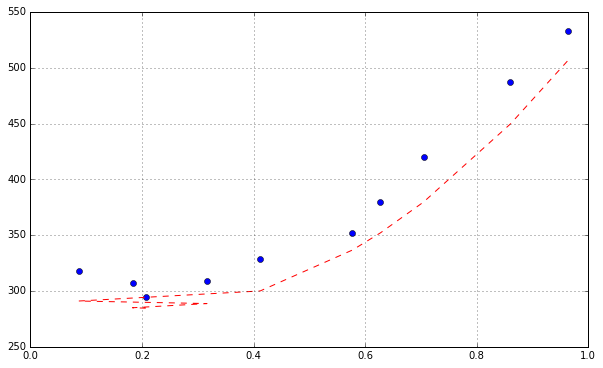

In [6]:
ref_intensity = 600
#print(data)
val = data.loc[data.I == ref_intensity]
#print(val)

fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()
bins=np.linspace(0.0, 1, val.S.size)


ax2.plot(val.cos2, val.S, lw=0, marker='o')
ax2.plot(val.cos2, S_i(c,a,b, val.cos2, 350), 'r--')
cos_ref=np.cos(38.*np.pi/180.)**2

print(cos_ref)
plt.show()

In [ ]:
np.cos(0)